# Task 2: Decision trees and random forests

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [2]:
train_data = pd.read_csv('ADULT_TRAIN.csv')
test_data = pd.read_csv('ADULT_TEST.csv')
X_train_dict = train_data.iloc[:,:-1].to_dict('records')
print(X_train_dict[0])
Y_train = train_data.iloc[:,-1:]
X_test_dict = test_data.iloc[:,:-1].to_dict('records')
Y_test = test_data.iloc[:,-1:]

{'age': 27, 'workclass': 'Private', 'education': 'Some-college', 'education-num': 10, 'marital-status': 'Divorced', 'occupation': 'Adm-clerical', 'relationship': 'Unmarried', 'race': 'White', 'sex': 'Female', 'capital-gain': 0, 'capital-loss': 0, 'hours-per-week': 44, 'native-country': 'United-States'}


In [3]:
train_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,43,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,44,Private,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States,<=50K
32558,23,Private,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
32559,45,Local-gov,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K


In [4]:
test_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
Y_train

,target
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,>50K
...,...
32556,>50K
32557,<=50K
32558,<=50K
32559,>50K


The target variable has only two different values which makes it a dichotomous target variable. The dataset is unbalanced because three-quarters of the target variable is less than 50K. 

In [6]:
X_train_dict

[{'age': 27,
  'workclass': 'Private',
  'education': 'Some-college',
  'education-num': 10,
  'marital-status': 'Divorced',
  'occupation': 'Adm-clerical',
  'relationship': 'Unmarried',
  'race': 'White',
  'sex': 'Female',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 44,
  'native-country': 'United-States'},
 {'age': 27,
  'workclass': 'Private',
  'education': 'Bachelors',
  'education-num': 13,
  'marital-status': 'Never-married',
  'occupation': 'Prof-specialty',
  'relationship': 'Not-in-family',
  'race': 'White',
  'sex': 'Female',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 40,
  'native-country': 'United-States'},
 {'age': 25,
  'workclass': 'Private',
  'education': 'Assoc-acdm',
  'education-num': 12,
  'marital-status': 'Married-civ-spouse',
  'occupation': 'Sales',
  'relationship': 'Husband',
  'race': 'White',
  'sex': 'Male',
  'capital-gain': 0,
  'capital-loss': 0,
  'hours-per-week': 40,
  'native-country': 'United-States'},
 {'ag

The dataset has 14 features including the target feature.

In [7]:
vect = DictVectorizer()
X_train_vec = vect.fit_transform(X_train_dict)
X_test_vec = vect.transform(X_test_dict)

To cope with the non-numerical features, DictionaryVectorizer is used.

In [8]:
X_train_vec

<32561x107 sparse matrix of type '<class 'numpy.float64'>'
	with 423293 stored elements in Compressed Sparse Row format>

## Underfitting and overfitting in decision tree classifiers.

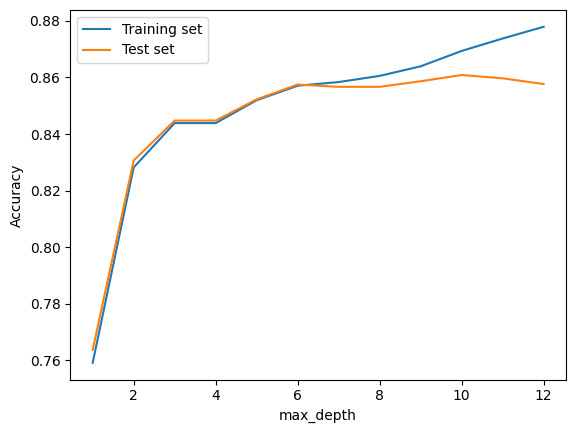

In [9]:
train_scores = []
test_scores = []

# Define the range of max_depth values to try
max_depth_values = range(1, 13)

# Train a decision tree for each value of max_depth and compute the evaluation scores
for max_depth in max_depth_values:
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(X_train_vec, Y_train)
    y_pred_train = dtc.predict(X_train_vec)
    train_scores.append(accuracy_score(Y_train, y_pred_train))
    test_scores.append(dtc.score(X_test_vec, Y_test))

# Plot the evaluation scores for different values of max_depth
plt.plot(max_depth_values, train_scores, label='Training set')
plt.plot(max_depth_values, test_scores, label='Test set')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In classification problems, accuracy is a commonly used metric to evaluate the performance of a model. On the other hand, mean squared error is typically used in regression problems. While accuracy measures the proportion of correct predictions made by a model, mean squared error quantifies the average squared difference between the predicted and actual values in regression problems. In our previous assignment, we focused on using mean squared error as the evaluation metric and did not explore accuracy. However, it is important to note that the two metrics may tell different stories about a model's performance. While the mean squared error increases, the model's success decreases, unlike accuracy. Regarding the use of cross-validation, we were required not to use it in the fourth step of Task 4 in our previous assignment, as we were specifically investigating overfitting. In this assignment, we also did not use cross-validation for the same reason. By not using cross-validation, we are not able to estimate the performance of the model on unseen data, which is an important aspect of model evaluation. However, by focusing on overfitting, we are able to investigate how well the model generalizes to unseen data and avoid over-optimizing the model for the training data.

As for the plot above, it illustrates the accuracy of different models with varying max_depth parameters for both the training and test datasets. The accuracy of the test dataset tends to increase with the max_depth parameter until it reaches a point where it starts to decrease, while the accuracy of the training dataset continues to increase. This suggests that the model is starting to overfit the training data, as it becomes too complex and starts to fit the noise in the data rather than the underlying patterns. This can be problematic, as it may lead to poor generalization performance on unseen data.

## Underfitting and overfitting in random forest classifiers.

### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

Here, the accuracy of the test and training dataset was calculated with different n_esimators and max_depth values. 

The decision tree classifier is a single decision tree that is trained on the given data, while the random forest classifier is an ensemble of multiple decision trees.

The difference between the curve for a decision tree and for a random forest with an ensemble size of 1 is that the curve for the random forest has more sharp transitions. However, because the random forest classifier employs multiple decision trees, the plot tends to fluctuate due to the abrupt transitions between different values of max_depth. The decision tree classifier has a tendency to overfit the training data when the max_depth hyperparameter increases, which means that the training accuracy goes up while the test accuracy goes down. As a result, the classifier's training and test accuracies quickly rise, but then level out as the max_depth hyperparameter increases, giving the plot a logarithmic appearance.

### What happens with the best observed test set accuracy as the ensemble size grows?

The random forest classifier uses multiple decision trees to reduce overfitting and improve generalization. This leads to more stable training and test accuracies across different values of max_depth compared to the decision tree classifier. As the max_depth rises, the possibility of overfitting rises as well in the random forest too. As the ensemble size grows, the best-observed test set accuracy tends to increase and be stable. This can be seen as evidence of the efficacy of the random forest classifier in mitigating overfitting.

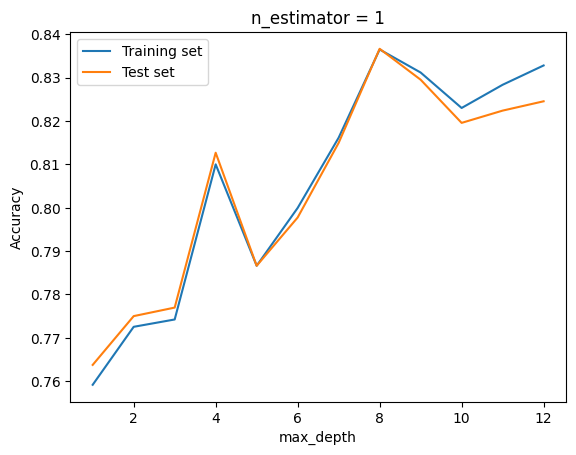

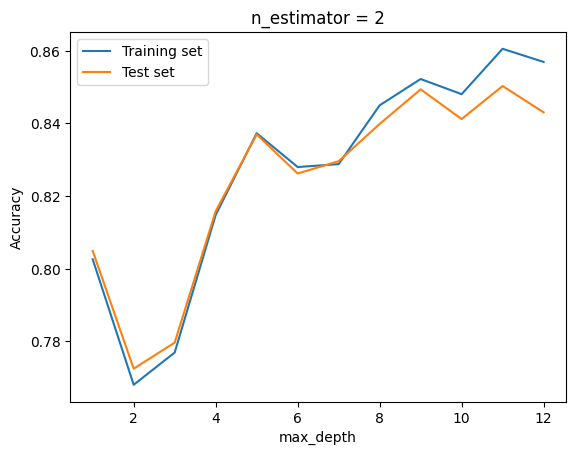

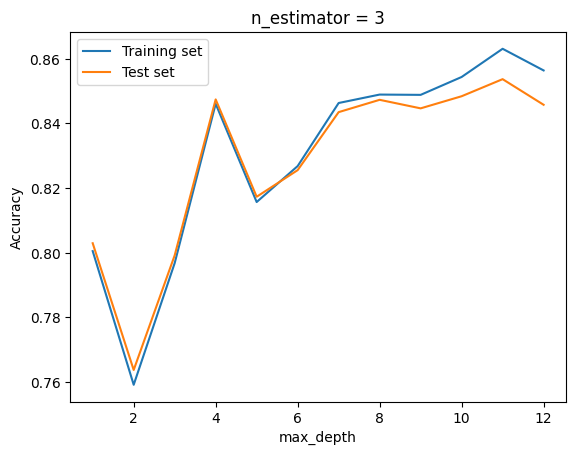

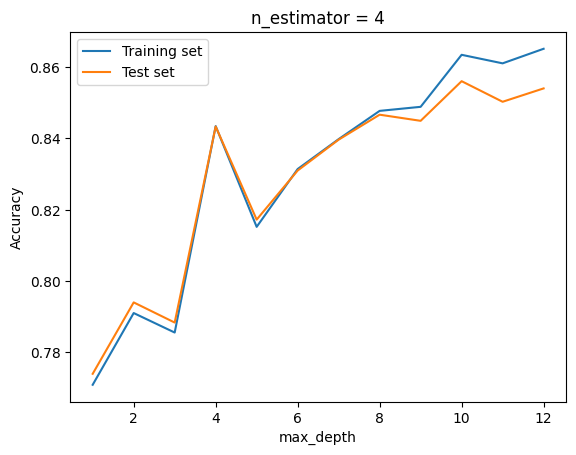

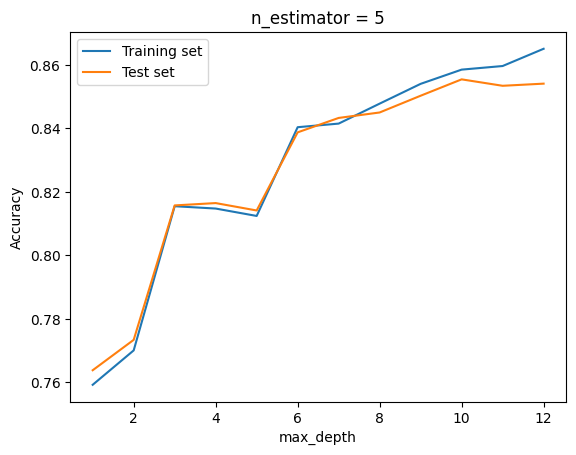

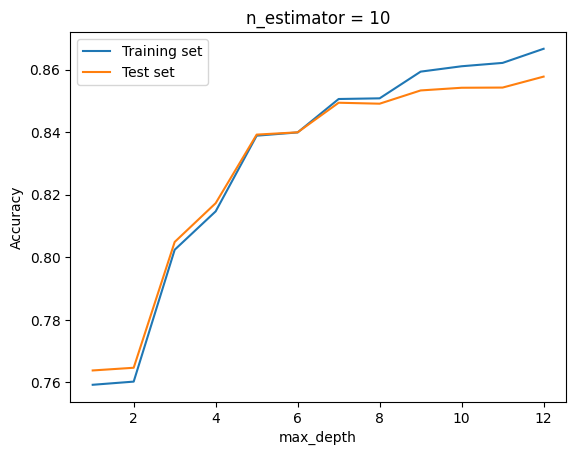

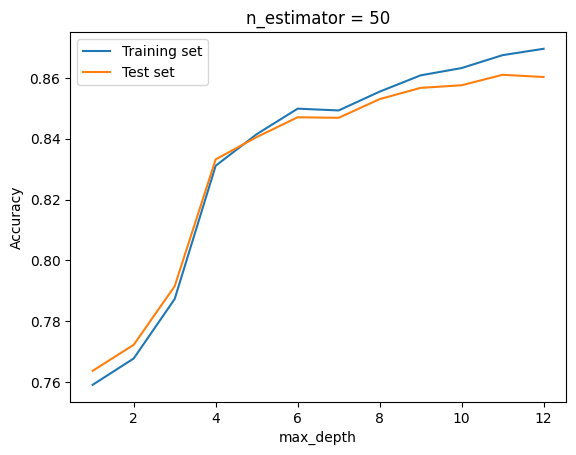

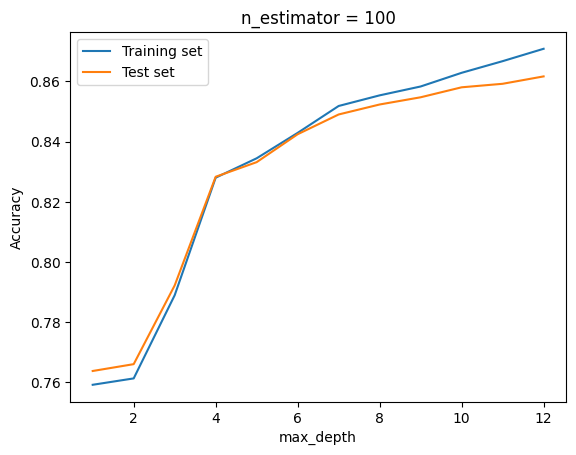

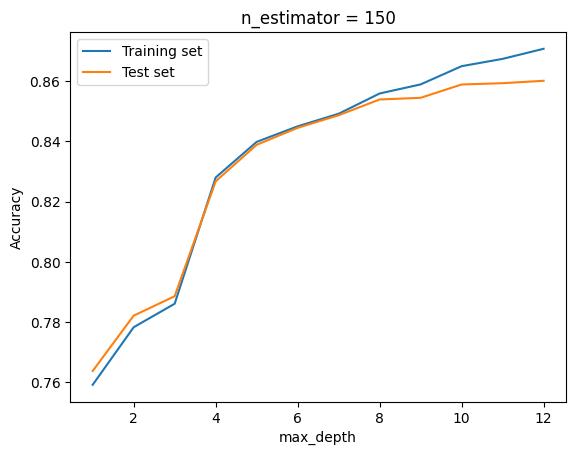

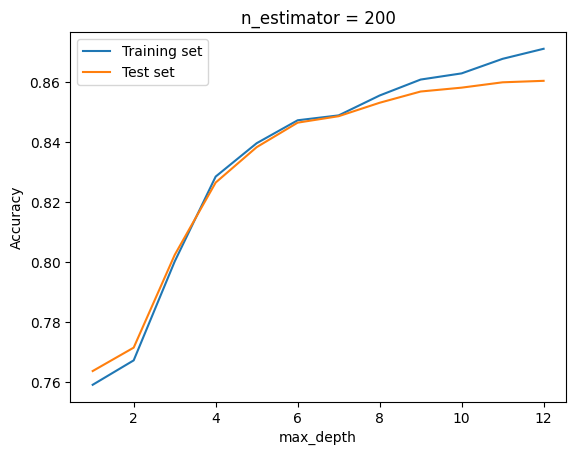

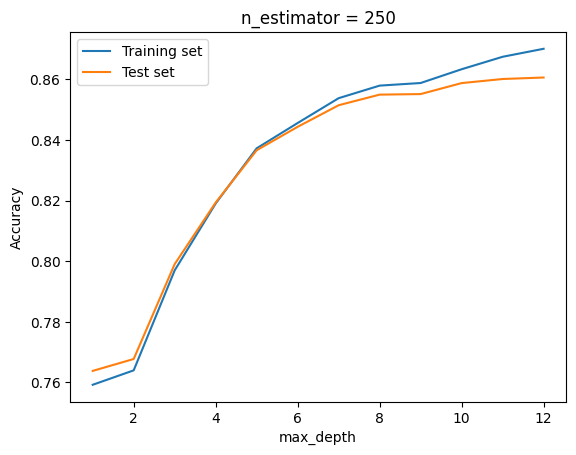

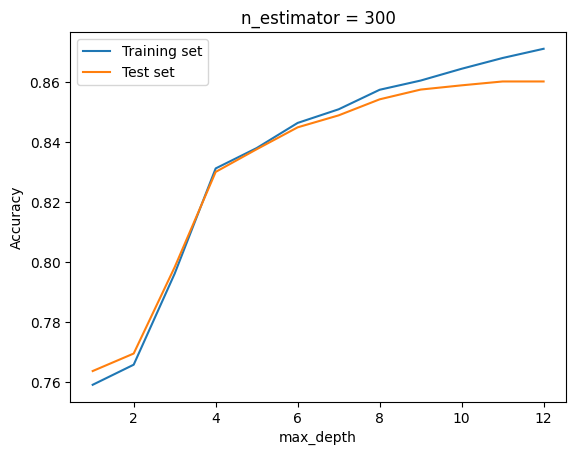

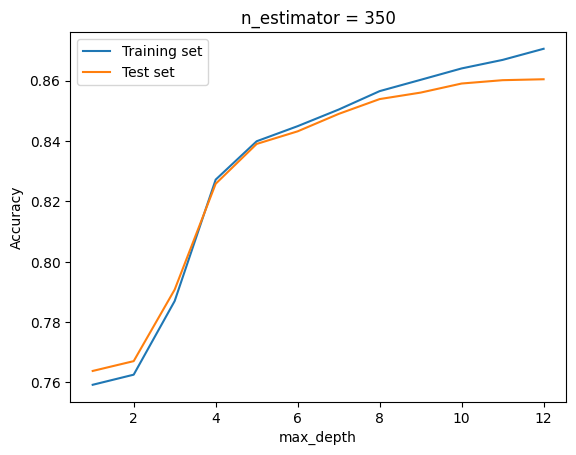

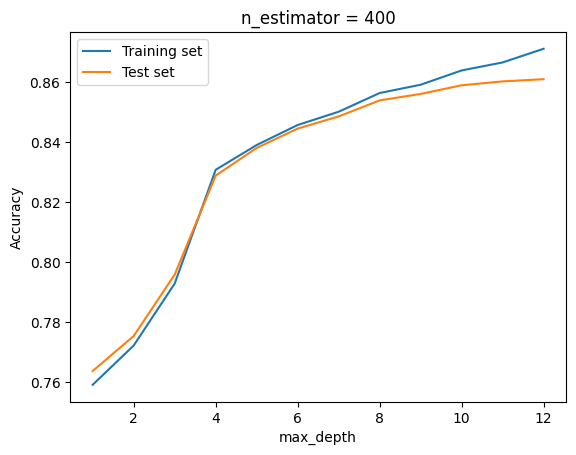

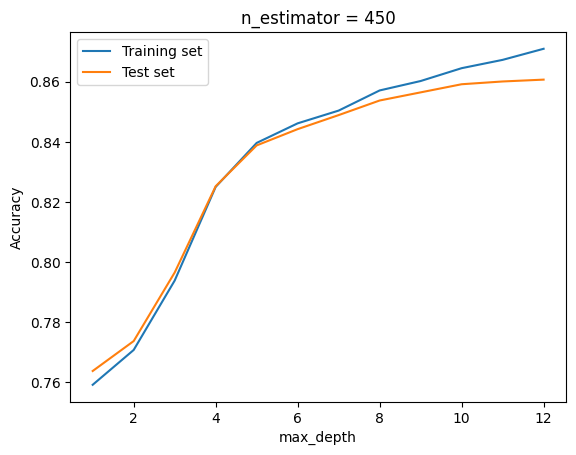

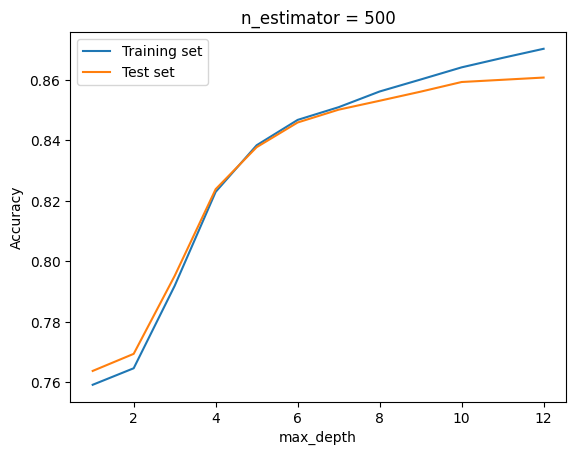

In [10]:

Y_train = Y_train['target'].values
n_estimators_list = [1,2,3,4,5,10,50,100,150,200,250,300,350,400,450,500]
# Train a decision tree for each value of max_depth and compute the evaluation scores
for estimator in n_estimators_list:
    train_scores = []
    test_scores = []
    for max_depth in max_depth_values:
        rfc = RandomForestClassifier(max_depth=max_depth, n_estimators = estimator)
        rfc.fit(X_train_vec, Y_train)
        y_pred_train = rfc.predict(X_train_vec)
        train_scores.append(accuracy_score(Y_train, y_pred_train))
        test_scores.append(rfc.score(X_test_vec, Y_test))

    # Plot the evaluation scores for different values of max_depth
    
    plt.title("n_estimator = "+ str(estimator))
    plt.plot(max_depth_values, train_scores, label='Training set')
    plt.plot(max_depth_values, test_scores, label='Test set')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

- What happens with the curve for random forests as the ensemble size grows?


The initial plots presented in the analysis demonstrate the fluctuation of accuracies across various hyperparameter settings. Specifically, it can be observed that as the number of estimators increases, the fluctuation in accuracies diminishes, and the resultant graph appears to have a logarithmic trend. This indicates that a higher number of estimators can lead to better accuracy, but there is a diminishing return on investment as the number of estimators becomes excessively large. 

Furthermore, the analysis indicates that higher values of the max_depth hyperparameter can lead to overfitting of the model, while values below three can result in underfitting. It is important to consider the trade-off between overfitting and underfitting, as a model that is too complex may perform well on the training dataset, but may not generalize well to new, unseen data.

Interestingly, the analysis also highlights instances where the accuracy of the test dataset is higher than the training dataset. This phenomenon could potentially be attributed to the distribution of the data, whereby the test dataset is more representative of the underlying population than the training dataset. However, further investigation would be required to confirm this hypothesis.

Overall, the insights gained from this analysis provide valuable information for refining the hyperparameters of the machine learning model and enhancing its predictive performance.

- What happens with the training time as the ensemble size grows?

Another thing is that, as the n_estimators grow up, the time to build models is incredibly increasing. This is because each decision tree is built independently of the others, and the process is parallelized to improve performance. Therefore, the more decision trees there are, the more parallelizable work there is to do, and the longer it will take to complete the training process.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e2e8444-e1fc-4224-9943-b161fccfd54d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>